In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tifffile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/tmp/ipykernel_3280944/2559300478.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data before and after registration 
- each row is a nucleus, each column is a stain

In [8]:
df_registered=pd.read_csv('/fs5/p_masi/rudravg/MxIF_Vxm_Registered/sheets/instance_data_allMarkers.csv')
df_unregistered=pd.read_csv('/fs5/p_masi/rudravg/MxIF_Vxm_Registered/sheets/unregistered_instance_data_allMarkers4.csv')

### 15 stains. does not include DAPI, does not include muc2 (muc2 doesn't stain nuclei)

In [9]:
stain_cols = [  
                'Mean_NAKATPASE', 
                'Mean_PANCK', 
                'Mean_CGA', 
                'Mean_SOX9', 
                'Mean_OLFM4',

                'Mean_VIMENTIN', 
                
                'Mean_SMA',


                'Mean_CD11B', 
                'Mean_CD20',
                'Mean_CD3D', 
                'Mean_CD45', 
                'Mean_CD4', 
                'Mean_CD68', 
                'Mean_CD8',
                'Mean_LYSOZYME', 
                
                ]

In [10]:
merged_df = pd.DataFrame()

for stain in stain_cols:

    merged_df[stain] = df_unregistered[stain]
    merged_df[stain + "_reg"] = df_registered[stain]


In [11]:
merged_df

,Mean_NAKATPASE,Mean_NAKATPASE_reg,Mean_PANCK,Mean_PANCK_reg,Mean_CGA,Mean_CGA_reg,Mean_SOX9,Mean_SOX9_reg,Mean_OLFM4,Mean_OLFM4_reg,...,Mean_CD45,Mean_CD45_reg,Mean_CD4,Mean_CD4_reg,Mean_CD68,Mean_CD68_reg,Mean_CD8,Mean_CD8_reg,Mean_LYSOZYME,Mean_LYSOZYME_reg
0,7.539797,5.506859,10.400868,12.922203,53.438496,54.491450,19.296670,20.475685,12.723589,12.912239,...,10.047757,10.065109,8.725037,9.038682,30.130245,33.166344,7.031838,7.344095,21.402315,24.482334
1,2.485666,3.486576,6.779090,9.746971,26.011805,29.537268,11.111299,13.219234,1.477234,2.387965,...,7.942665,8.459864,8.531198,8.953163,14.418213,17.516010,6.998313,8.361811,11.431704,13.709691
2,3.500000,4.350584,11.623287,9.440338,57.972603,62.925568,26.520548,28.975590,5.109589,4.583197,...,12.767123,12.558101,12.068493,13.200261,38.116440,41.904877,8.027397,6.967558,26.465754,28.546090
3,1.689655,1.551260,8.356322,4.660174,27.011494,25.203850,14.413794,13.585345,3.080460,2.403904,...,9.022988,8.425634,14.080460,14.020105,20.310345,16.812290,6.367816,5.727922,16.390804,15.700595
4,3.507273,3.675532,12.707273,12.889375,65.747280,70.342330,32.423637,32.103024,5.674545,5.132037,...,13.581819,13.741249,13.436363,14.155535,39.834545,39.798600,7.770909,7.770269,30.481817,30.514978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,4.627685,3.986488,15.983294,12.826566,55.568020,48.948402,30.510740,25.281425,6.272077,4.683855,...,12.942720,12.707762,13.940334,13.651572,39.455850,34.975105,9.284010,8.451630,28.980907,22.839394
2021,3.156398,3.623349,6.241706,8.651485,16.047394,17.982538,11.549763,19.896626,1.772512,3.250487,...,8.270143,9.298810,8.587678,9.082796,16.786730,17.920979,6.379147,6.782341,10.118484,16.806149
2022,2.117310,2.535751,5.357654,6.743105,27.243204,31.913029,16.719599,19.596827,2.018598,2.016038,...,8.658083,8.969516,10.321888,11.504808,16.856940,20.717396,5.371960,5.711132,16.828325,18.522099
2023,3.566964,3.297198,15.392858,15.370728,67.216515,78.772760,27.727678,31.604475,4.095982,4.163009,...,16.859375,17.675615,15.296875,15.404649,32.745537,36.653170,8.669642,8.814672,27.316965,30.781301


In [39]:
colors = ["#3498db" if x%2==0 else "#e74c3c" for x in range(15*2) ]

In [16]:
merged_df["Differences"]=merged_df.iloc[:, 3] - merged_df.iloc[:, 2]

In [17]:
merged_df

,Mean_NAKATPASE,Mean_NAKATPASE_reg,Mean_PANCK,Mean_PANCK_reg,Mean_CGA,Mean_CGA_reg,Mean_SOX9,Mean_SOX9_reg,Mean_OLFM4,Mean_OLFM4_reg,...,Mean_CD45_reg,Mean_CD4,Mean_CD4_reg,Mean_CD68,Mean_CD68_reg,Mean_CD8,Mean_CD8_reg,Mean_LYSOZYME,Mean_LYSOZYME_reg,Differences
0,7.539797,5.506859,10.400868,12.922203,53.438496,54.491450,19.296670,20.475685,12.723589,12.912239,...,10.065109,8.725037,9.038682,30.130245,33.166344,7.031838,7.344095,21.402315,24.482334,2.521335
1,2.485666,3.486576,6.779090,9.746971,26.011805,29.537268,11.111299,13.219234,1.477234,2.387965,...,8.459864,8.531198,8.953163,14.418213,17.516010,6.998313,8.361811,11.431704,13.709691,2.967881
2,3.500000,4.350584,11.623287,9.440338,57.972603,62.925568,26.520548,28.975590,5.109589,4.583197,...,12.558101,12.068493,13.200261,38.116440,41.904877,8.027397,6.967558,26.465754,28.546090,-2.182949
3,1.689655,1.551260,8.356322,4.660174,27.011494,25.203850,14.413794,13.585345,3.080460,2.403904,...,8.425634,14.080460,14.020105,20.310345,16.812290,6.367816,5.727922,16.390804,15.700595,-3.696148
4,3.507273,3.675532,12.707273,12.889375,65.747280,70.342330,32.423637,32.103024,5.674545,5.132037,...,13.741249,13.436363,14.155535,39.834545,39.798600,7.770909,7.770269,30.481817,30.514978,0.182102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,4.627685,3.986488,15.983294,12.826566,55.568020,48.948402,30.510740,25.281425,6.272077,4.683855,...,12.707762,13.940334,13.651572,39.455850,34.975105,9.284010,8.451630,28.980907,22.839394,-3.156728
2021,3.156398,3.623349,6.241706,8.651485,16.047394,17.982538,11.549763,19.896626,1.772512,3.250487,...,9.298810,8.587678,9.082796,16.786730,17.920979,6.379147,6.782341,10.118484,16.806149,2.409779
2022,2.117310,2.535751,5.357654,6.743105,27.243204,31.913029,16.719599,19.596827,2.018598,2.016038,...,8.969516,10.321888,11.504808,16.856940,20.717396,5.371960,5.711132,16.828325,18.522099,1.385452
2023,3.566964,3.297198,15.392858,15.370728,67.216515,78.772760,27.727678,31.604475,4.095982,4.163009,...,17.675615,15.296875,15.404649,32.745537,36.653170,8.669642,8.814672,27.316965,30.781301,-0.022130


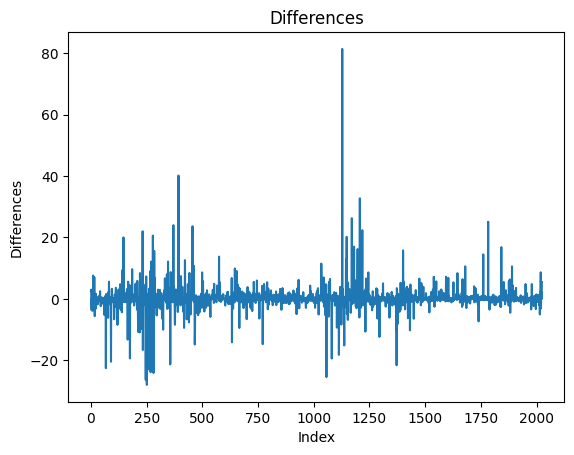

In [18]:
merged_df['Differences'].plot(kind='line')
plt.title('Differences')
plt.xlabel('Index')
plt.ylabel('Differences')
plt.show()

In [37]:
merged_df

,Mean_NAKATPASE,Mean_NAKATPASE_reg,Mean_PANCK,Mean_PANCK_reg,Mean_CGA,Mean_CGA_reg,Mean_SOX9,Mean_SOX9_reg,Mean_OLFM4,Mean_OLFM4_reg,...,Mean_CD45,Mean_CD45_reg,Mean_CD4,Mean_CD4_reg,Mean_CD68,Mean_CD68_reg,Mean_CD8,Mean_CD8_reg,Mean_LYSOZYME,Mean_LYSOZYME_reg
0,7.539797,5.506859,10.400868,12.922203,53.438496,54.491450,19.296670,20.475685,12.723589,12.912239,...,10.047757,10.065109,8.725037,9.038682,30.130245,33.166344,7.031838,7.344095,21.402315,24.482334
1,2.485666,3.486576,6.779090,9.746971,26.011805,29.537268,11.111299,13.219234,1.477234,2.387965,...,7.942665,8.459864,8.531198,8.953163,14.418213,17.516010,6.998313,8.361811,11.431704,13.709691
2,3.500000,4.350584,11.623287,9.440338,57.972603,62.925568,26.520548,28.975590,5.109589,4.583197,...,12.767123,12.558101,12.068493,13.200261,38.116440,41.904877,8.027397,6.967558,26.465754,28.546090
3,1.689655,1.551260,8.356322,4.660174,27.011494,25.203850,14.413794,13.585345,3.080460,2.403904,...,9.022988,8.425634,14.080460,14.020105,20.310345,16.812290,6.367816,5.727922,16.390804,15.700595
4,3.507273,3.675532,12.707273,12.889375,65.747280,70.342330,32.423637,32.103024,5.674545,5.132037,...,13.581819,13.741249,13.436363,14.155535,39.834545,39.798600,7.770909,7.770269,30.481817,30.514978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,4.627685,3.986488,15.983294,12.826566,55.568020,48.948402,30.510740,25.281425,6.272077,4.683855,...,12.942720,12.707762,13.940334,13.651572,39.455850,34.975105,9.284010,8.451630,28.980907,22.839394
2021,3.156398,3.623349,6.241706,8.651485,16.047394,17.982538,11.549763,19.896626,1.772512,3.250487,...,8.270143,9.298810,8.587678,9.082796,16.786730,17.920979,6.379147,6.782341,10.118484,16.806149
2022,2.117310,2.535751,5.357654,6.743105,27.243204,31.913029,16.719599,19.596827,2.018598,2.016038,...,8.658083,8.969516,10.321888,11.504808,16.856940,20.717396,5.371960,5.711132,16.828325,18.522099
2023,3.566964,3.297198,15.392858,15.370728,67.216515,78.772760,27.727678,31.604475,4.095982,4.163009,...,16.859375,17.675615,15.296875,15.404649,32.745537,36.653170,8.669642,8.814672,27.316965,30.781301


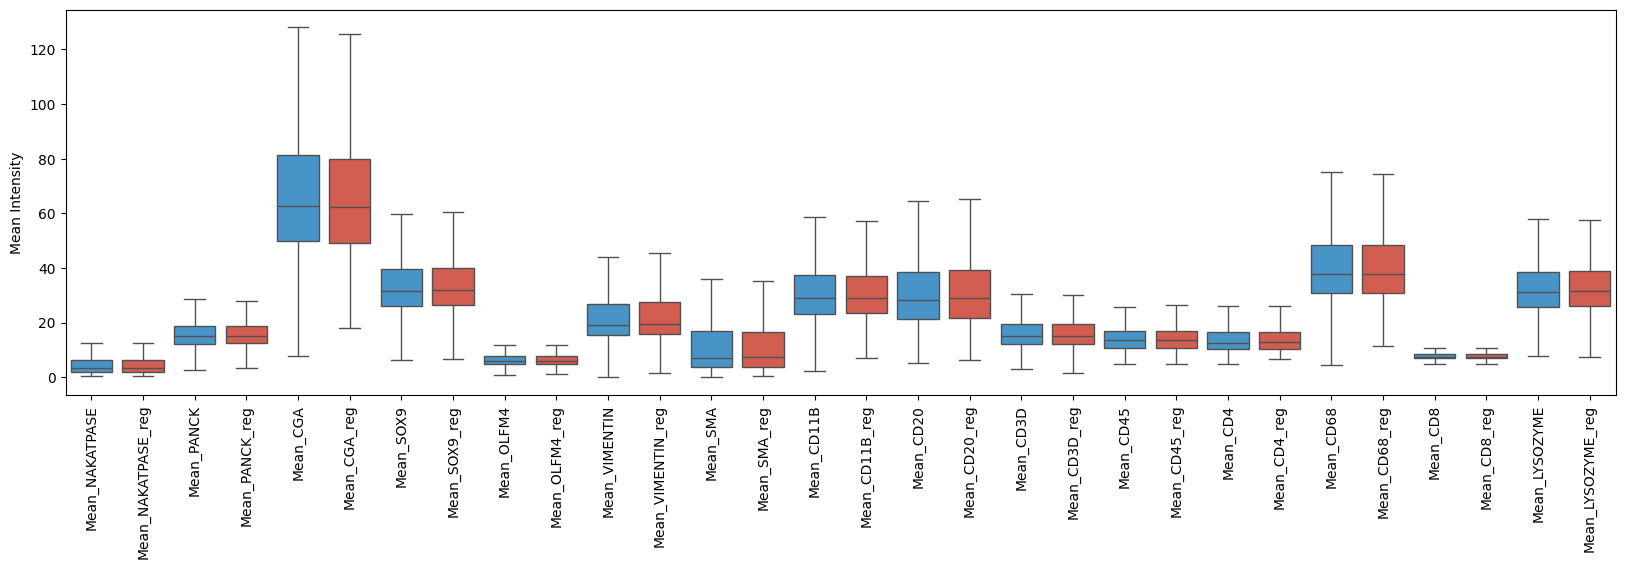

In [57]:
plt.figure(figsize=(20,5))
sns.boxplot(data=merged_df, palette=colors, showfliers=False)
# sns.stripplot(data=merged_df, color="black", s=1, jitter=0.3, alpha=0.5)

plt.xticks(rotation=90)
plt.ylabel("Mean Intensity")
print()

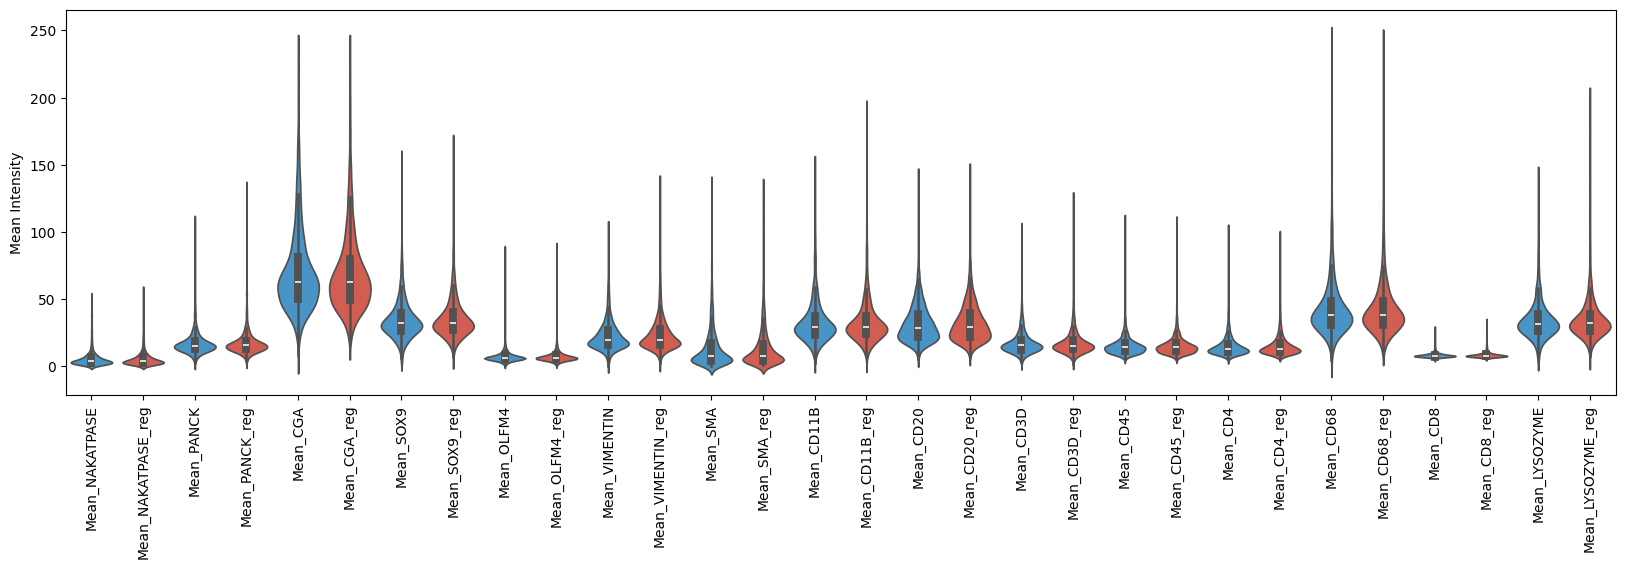

In [59]:
plt.figure(figsize=(20,5))
sns.violinplot(data=merged_df, palette=colors)

plt.xticks(rotation=90)
plt.ylabel("Mean Intensity")
print()

In [34]:
df_registered[stain_cols]

,Mean_NAKATPASE,Mean_PANCK,Mean_CGA,Mean_SOX9,Mean_OLFM4,Mean_VIMENTIN,Mean_SMA,Mean_CD11B,Mean_CD20,Mean_CD3D,Mean_CD45,Mean_CD4,Mean_CD68,Mean_CD8,Mean_LYSOZYME
0,5.506859,12.922203,54.491450,20.475685,12.912239,11.825674,1.409169,25.474297,19.611767,12.700852,10.065109,9.038682,33.166344,7.344095,24.482334
1,3.486576,9.746971,29.537268,13.219234,2.387965,11.056034,3.639329,12.016887,11.562890,7.017153,8.459864,8.953163,17.516010,8.361811,13.709691
2,4.350584,9.440338,62.925568,28.975590,4.583197,15.461877,8.932621,27.575605,29.747310,16.604221,12.558101,13.200261,41.904877,6.967558,28.546090
3,1.551260,4.660174,25.203850,13.585345,2.403904,6.478782,3.831406,14.630168,14.125654,6.424141,8.425634,14.020105,16.812290,5.727922,15.700595
4,3.675532,12.889375,70.342330,32.103024,5.132037,16.656094,18.674603,29.066334,33.056940,15.794691,13.741249,14.155535,39.798600,7.770269,30.514978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,3.986488,12.826566,48.948402,25.281425,4.683855,8.740997,2.270986,17.722977,31.906576,11.735078,12.707762,13.651572,34.975105,8.451630,22.839394
2021,3.623349,8.651485,17.982538,19.896626,3.250487,4.257689,1.680904,8.789463,9.132939,7.239645,9.298810,9.082796,17.920979,6.782341,16.806149
2022,2.535751,6.743105,31.913029,19.596827,2.016038,7.710946,8.204322,12.278705,16.033123,7.256927,8.969516,11.504808,20.717396,5.711132,18.522099
2023,3.297198,15.370728,78.772760,31.604475,4.163009,17.471270,5.949603,27.101515,30.706026,16.602888,17.675615,15.404649,36.653170,8.814672,30.781301


In [35]:
df_unregistered[stain_cols]

,Mean_NAKATPASE,Mean_PANCK,Mean_CGA,Mean_SOX9,Mean_OLFM4,Mean_VIMENTIN,Mean_SMA,Mean_CD11B,Mean_CD20,Mean_CD3D,Mean_CD45,Mean_CD4,Mean_CD68,Mean_CD8,Mean_LYSOZYME
0,7.539797,10.400868,53.438496,19.296670,12.723589,10.409552,1.464544,21.837915,18.314037,12.334298,10.047757,8.725037,30.130245,7.031838,21.402315
1,2.485666,6.779090,26.011805,11.111299,1.477234,9.748735,3.197302,9.551434,9.483980,5.485666,7.942665,8.531198,14.418213,6.998313,11.431704
2,3.500000,11.623287,57.972603,26.520548,5.109589,13.828767,9.383562,27.356165,29.979452,15.349315,12.767123,12.068493,38.116440,8.027397,26.465754
3,1.689655,8.356322,27.011494,14.413794,3.080460,9.609196,4.034483,17.505747,15.655172,8.241380,9.022988,14.080460,20.310345,6.367816,16.390804
4,3.507273,12.707273,65.747280,32.423637,5.674545,16.892727,22.074545,30.094545,31.598183,16.290909,13.581819,13.436363,39.834545,7.770909,30.481817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,4.627685,15.983294,55.568020,30.510740,6.272077,10.594272,2.584726,22.262530,32.264915,14.360382,12.942720,13.940334,39.455850,9.284010,28.980907
2021,3.156398,6.241706,16.047394,11.549763,1.772512,2.312796,1.620853,7.312796,7.592417,7.255924,8.270143,8.587678,16.786730,6.379147,10.118484
2022,2.117310,5.357654,27.243204,16.719599,2.018598,6.477826,3.889843,9.117311,12.030043,5.463519,8.658083,10.321888,16.856940,5.371960,16.828325
2023,3.566964,15.392858,67.216515,27.727678,4.095982,13.973214,4.281250,24.906250,24.131697,15.752233,16.859375,15.296875,32.745537,8.669642,27.316965


In [64]:
import seaborn as sns

def plot_dataframes_box(df1, df2):
    n = len(df1.columns[3:-1])  # Number of columns to plot
    ncols = 3  # Number of columns in the subplot grid
    nrows = int(np.ceil(n / ncols))  # Number of rows in the subplot grid

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

    # Flatten the axes array
    axes = axes.ravel()

    # Create a boxplot for each column
    for i, column in enumerate(df1.columns[3:-1]):
        sns.boxplot(ax=axes[i], data=pd.concat([df1[[column]], df2[[column]]], keys=['Registered', 'Unregistered']).reset_index(), 
                    x='level_0', y=column)
        axes[i].set_title(column)
        axes[i].set_xlabel('')
        if i == 0:
            axes[i].legend(fontsize='small')

    # Remove the extra subplots
    for i in range(n, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


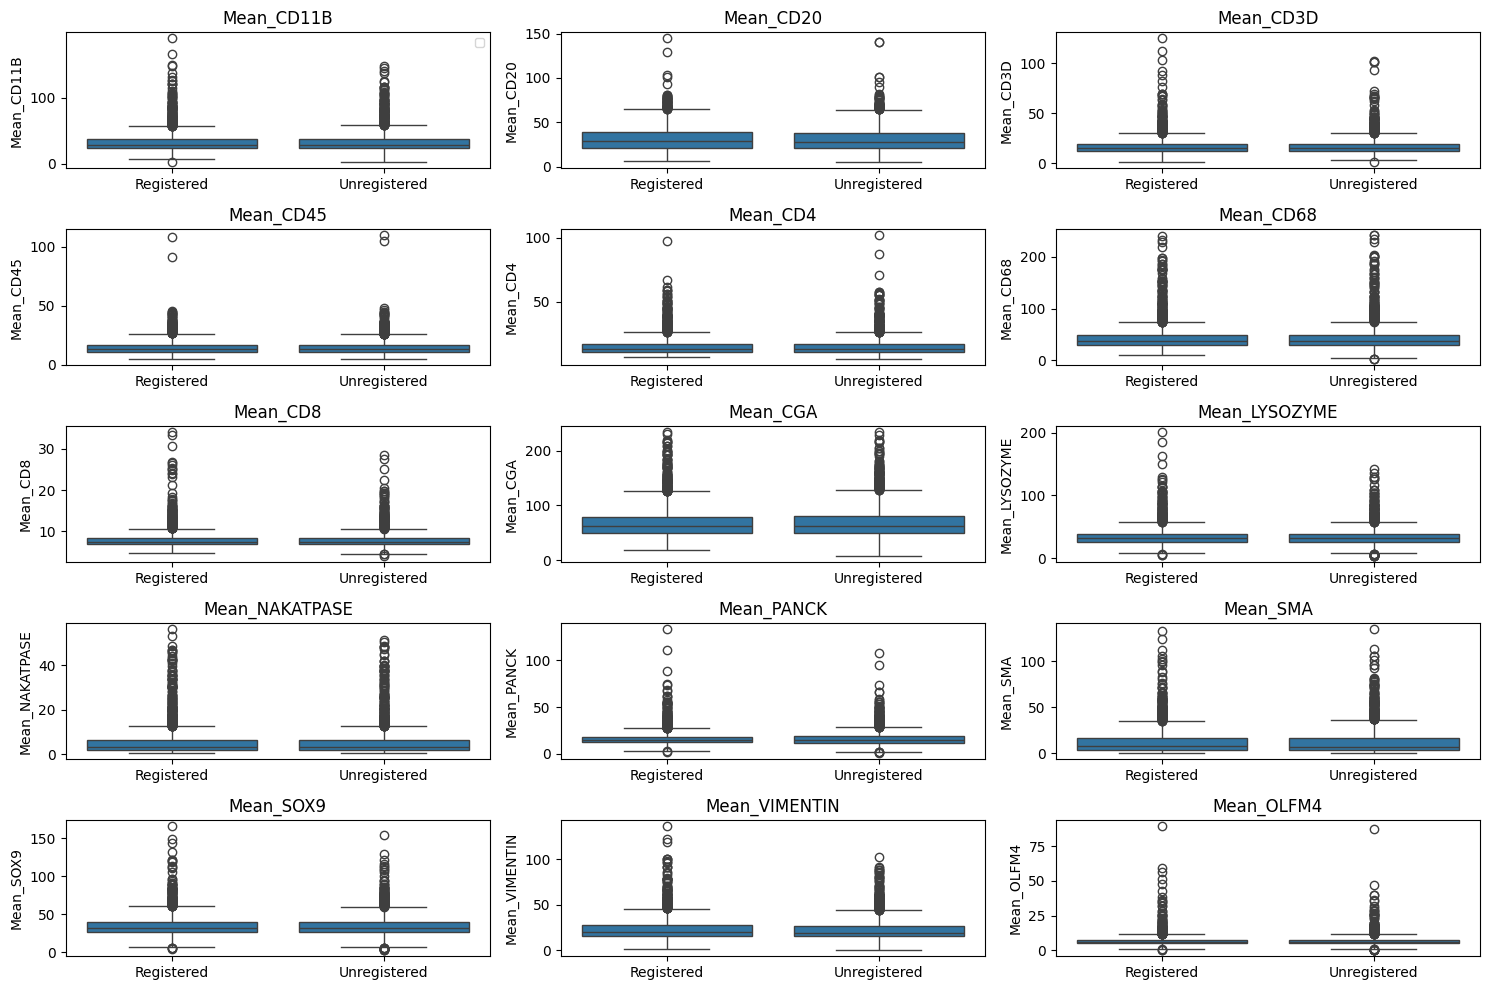

In [65]:
plot_dataframes_box(df_registered, df_unregistered)

In [58]:
def plot_dataframes_line(df1, df2):
    n = len(df1.columns[3:-1])  # Number of columns to plot
    ncols = 3  # Number of columns in the subplot grid
    nrows = int(np.ceil(n / ncols))  # Number of rows in the subplot grid

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

    # Flatten the axes array
    axes = axes.ravel()

    # Create a line plot for each column
    for i, column in enumerate(df1.columns[3:-1]):
        df1[column].plot(ax=axes[i], alpha=0.5, label='Registered' if i == 0 else "")
        df2[column].plot(ax=axes[i], alpha=0.5, label='Unregistered' if i == 0 else "")
        axes[i].set_title(column)
        if i == 0:
            axes[i].legend(fontsize='small')

    # Remove the extra subplots
    for i in range(n, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

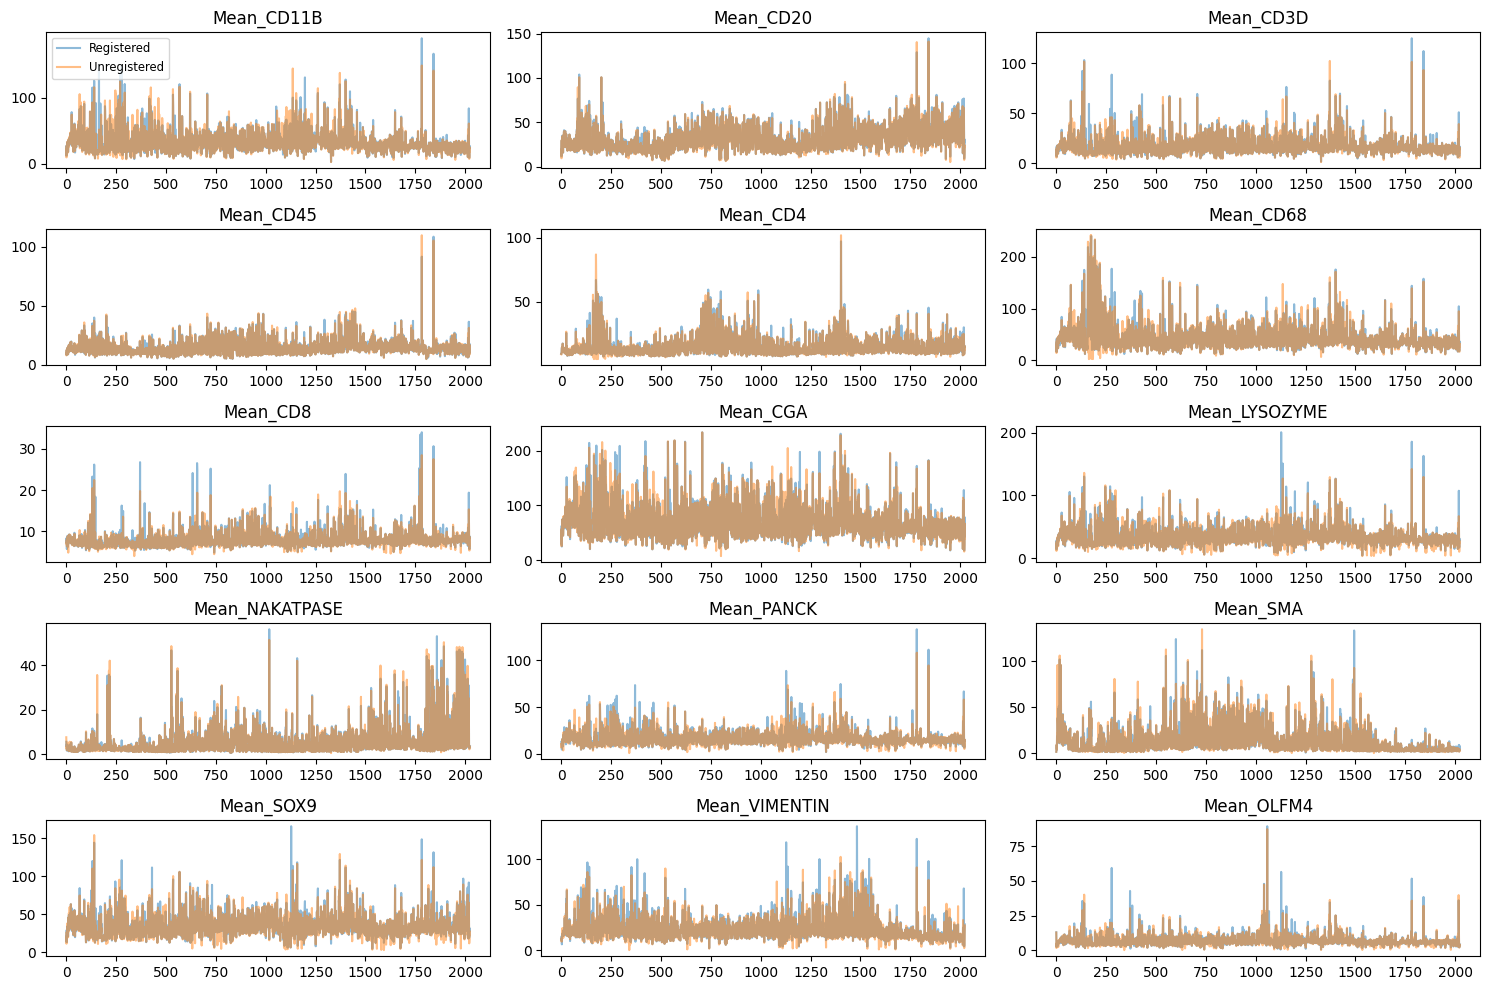

In [59]:
plot_dataframes_line(df_registered, df_unregistered)

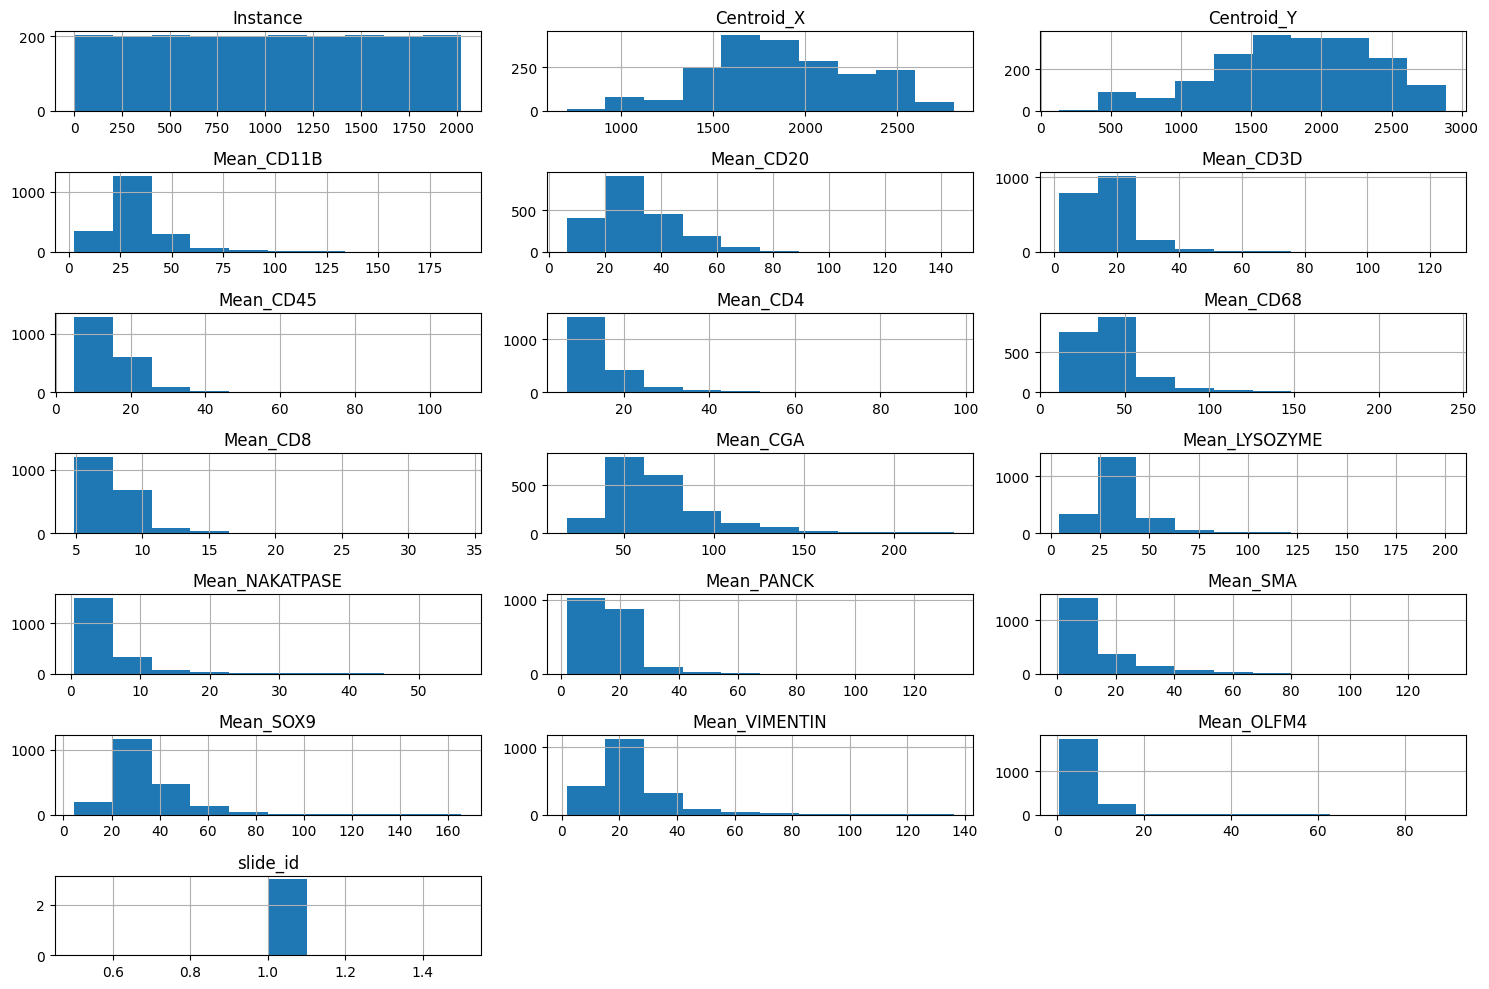

In [6]:
import numpy as np

# Calculate the number of rows and columns for the subplots
n = len(df_registered.columns[:])  # Number of columns to plot
ncols = 3  # Number of columns in the subplot grid
nrows = int(np.ceil(n / ncols))  # Number of rows in the subplot grid

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Flatten the axes array
axes = axes.ravel()

# Create a histogram for each column, skipping the first one
for i, column in enumerate(df_registered.columns[:]):
    df_registered[column].hist(ax=axes[i])
    axes[i].set_title(column)


# Remove the extra subplots
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

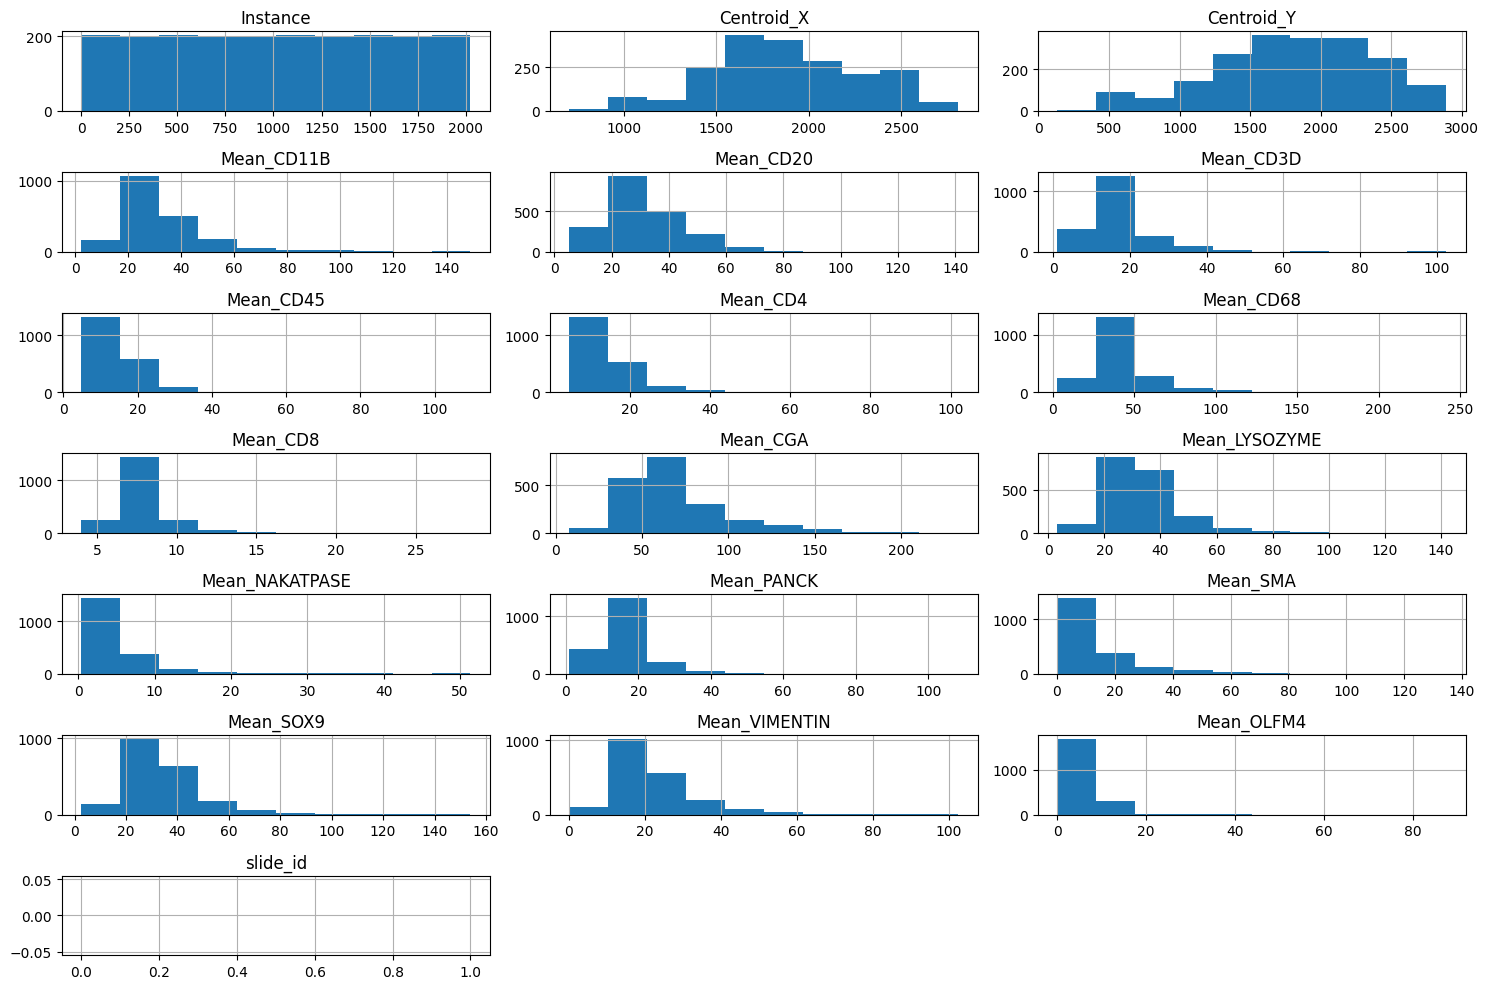

In [7]:
import numpy as np

# Calculate the number of rows and columns for the subplots
n = len(df_registered.columns[:])  # Number of columns to plot
ncols = 3  # Number of columns in the subplot grid
nrows = int(np.ceil(n / ncols))  # Number of rows in the subplot grid

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Flatten the axes array
axes = axes.ravel()

# Create a histogram for each column, skipping the first one
for i, column in enumerate(df_registered.columns[:]):
    df_unregistered[column].hist(ax=axes[i])
    axes[i].set_title(column)


# Remove the extra subplots
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [45]:
def bland_altman_plot(df1, df2):
    # Calculate the number of rows and columns for the subplots
    n = len(df1.columns[3:-1])  # Number of columns to plot
    ncols = 3  # Number of columns in the subplot grid
    nrows = int(np.ceil(n / ncols))  # Number of rows in the subplot grid

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

    # Flatten the axes array
    axes = axes.ravel()

    # Create a Bland-Altman plot for each column
    for i, column in enumerate(df1.columns[3:-1]):
        mean = (df1[column] + df2[column]) / 2
        diff = df1[column] - df2[column]
        sd_diff = np.std(diff, axis=0)
        axes[i].scatter(mean, diff, alpha=0.5)
        axes[i].axhline(y=np.mean(diff), color='r', linestyle='--')
        axes[i].axhline(y=np.mean(diff) + 2*sd_diff, color='b', linestyle='--')  # +1 sigma line
        axes[i].axhline(y=np.mean(diff) - 2*sd_diff, color='b', linestyle='--')  # -1 sigma line
        axes[i].set_title(column)
        axes[i].set_xlabel('Mean of methods')
        axes[i].set_ylabel('Difference of methods')
        axes[i].set_xlim([0,200])
        axes[i].set_ylim([-100,100])

    # Remove the extra subplots
    for i in range(n, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

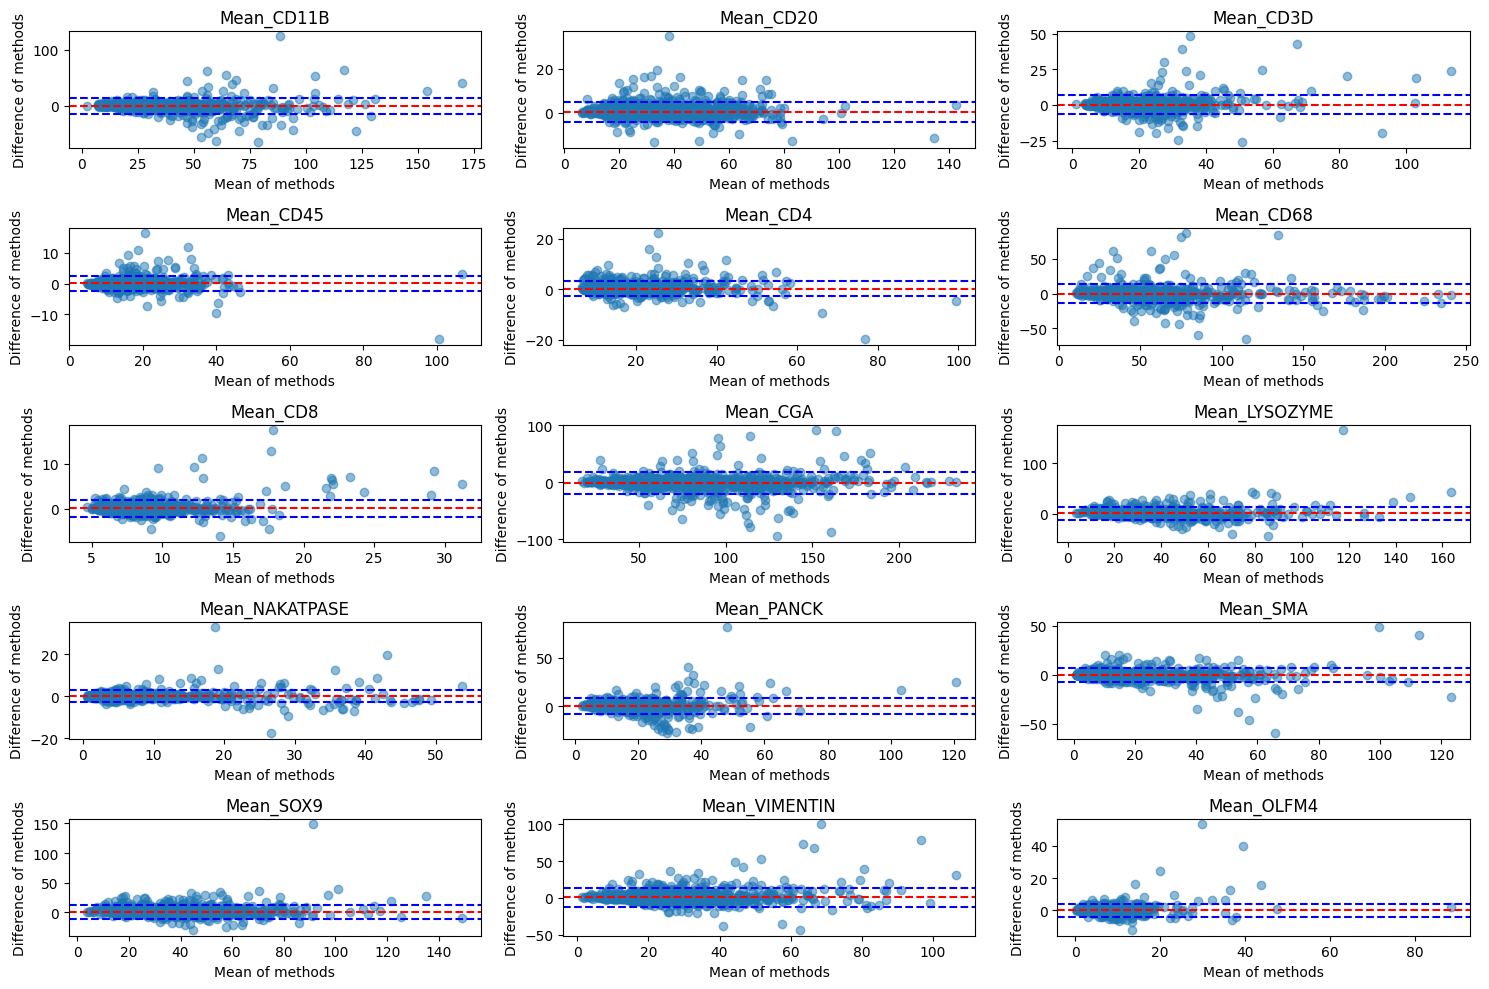

In [46]:
bland_altman_plot(df_registered, df_unregistered)

In [43]:
def bland_altman_plot(df1, df2):
    # Calculate the number of rows and columns for the subplots
    n = len(df1.columns[3:-1])  # Number of columns to plot
    ncols = 3  # Number of columns in the subplot grid
    nrows = int(np.ceil(n / ncols))  # Number of rows in the subplot grid

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

    # Flatten the axes array
    axes = axes.ravel()

    # Create a Bland-Altman plot for each column
    for i, column in enumerate(df1.columns[3:-1]):
        mean = (df1[column] + df2[column]) / 2
        diff = np.log((df1[column] - df2[column]) / (df1[column] + df2[column]))
        sd_diff = np.std(diff, axis=0)
        axes[i].scatter(mean, diff, alpha=0.5)
        axes[i].axhline(y=np.mean(diff), color='r', linestyle='--')
        axes[i].axhline(y=np.mean(diff) + 2*sd_diff, color='b', linestyle='--')  # +1 sigma line
        axes[i].axhline(y=np.mean(diff) - 2*sd_diff, color='b', linestyle='--')  # -1 sigma line
        axes[i].set_title(column)
        axes[i].set_xlabel('Mean of methods')
        axes[i].set_ylabel('log((a-b)/(a+b))')
        axes[i].set_ylim(-10, 10)
        axes[i].set_xlim(0, 200)


    # Remove the extra subplots
    for i in range(n, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

/home/local/VANDERBILT/rudravg/miniconda3/envs/dapi_reg/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/local/VANDERBILT/rudravg/miniconda3/envs/dapi_reg/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/local/VANDERBILT/rudravg/miniconda3/envs/dapi_reg/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


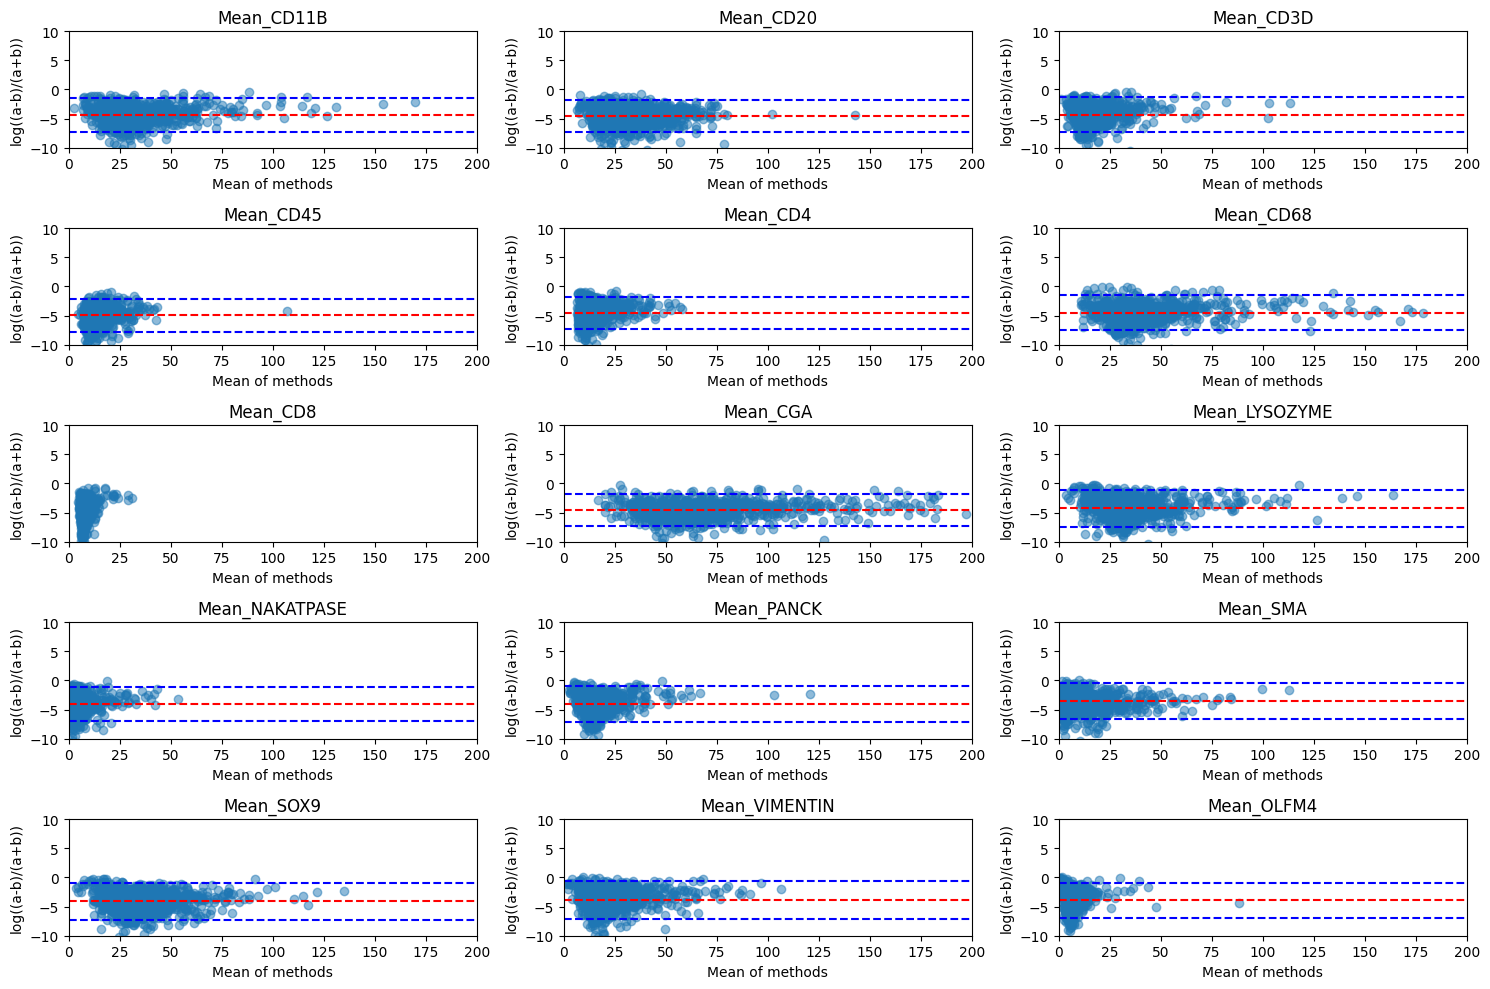

In [44]:
bland_altman_plot(df_registered,df_unregistered)

In [27]:
def plot_dataframe_v2s(df1, df2):
    # Calculate the number of rows and columns for the subplots
    n = len(df1.columns)  # Number of columns to plot
    ncols = 3  # Number of columns in the subplot grid
    nrows = int(np.ceil(n / ncols))  # Number of rows in the subplot grid

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

    # Flatten the axes array
    axes = axes.ravel()

    # Create a histogram for each column, skipping the first one
    for i, column in enumerate(df1.columns):
        df1[column].hist(ax=axes[i], alpha=0.5, label='Registered')
        df2[column].hist(ax=axes[i], alpha=0.5, label='Unregistered')
        axes[i].set_title(column)
        axes[i].set_xlim([0,1])
        axes[i].set_ylim([0, 2025])
        axes[i].legend()

    # Remove the extra subplots
    for i in range(n, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

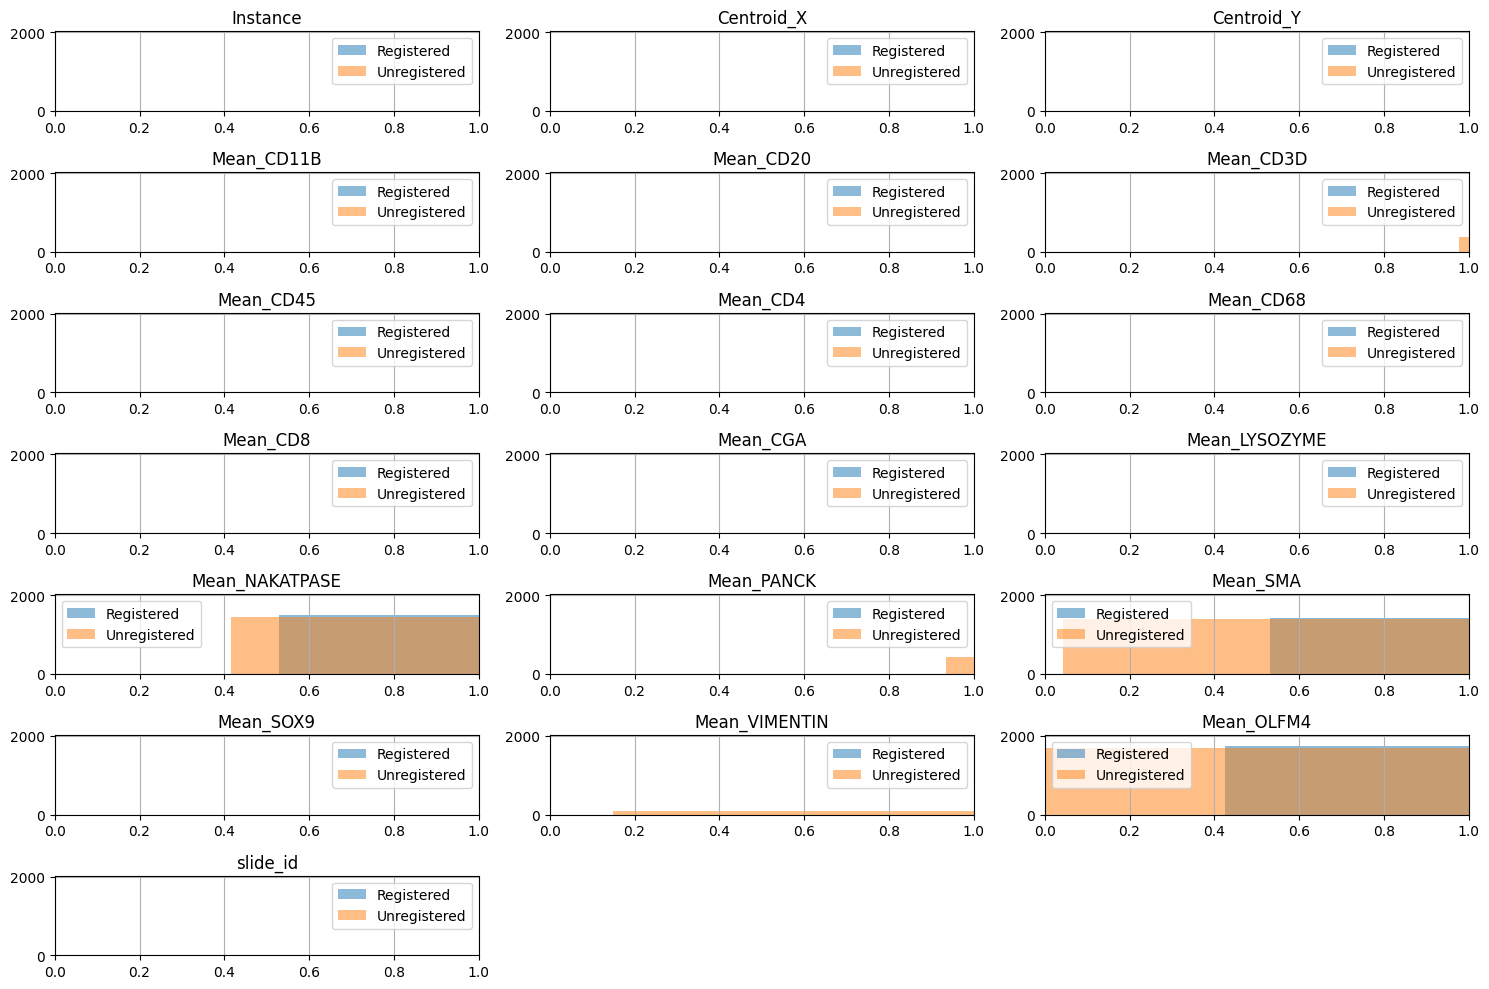

In [28]:
plot_dataframe_v2s(df_registered, df_unregistered)

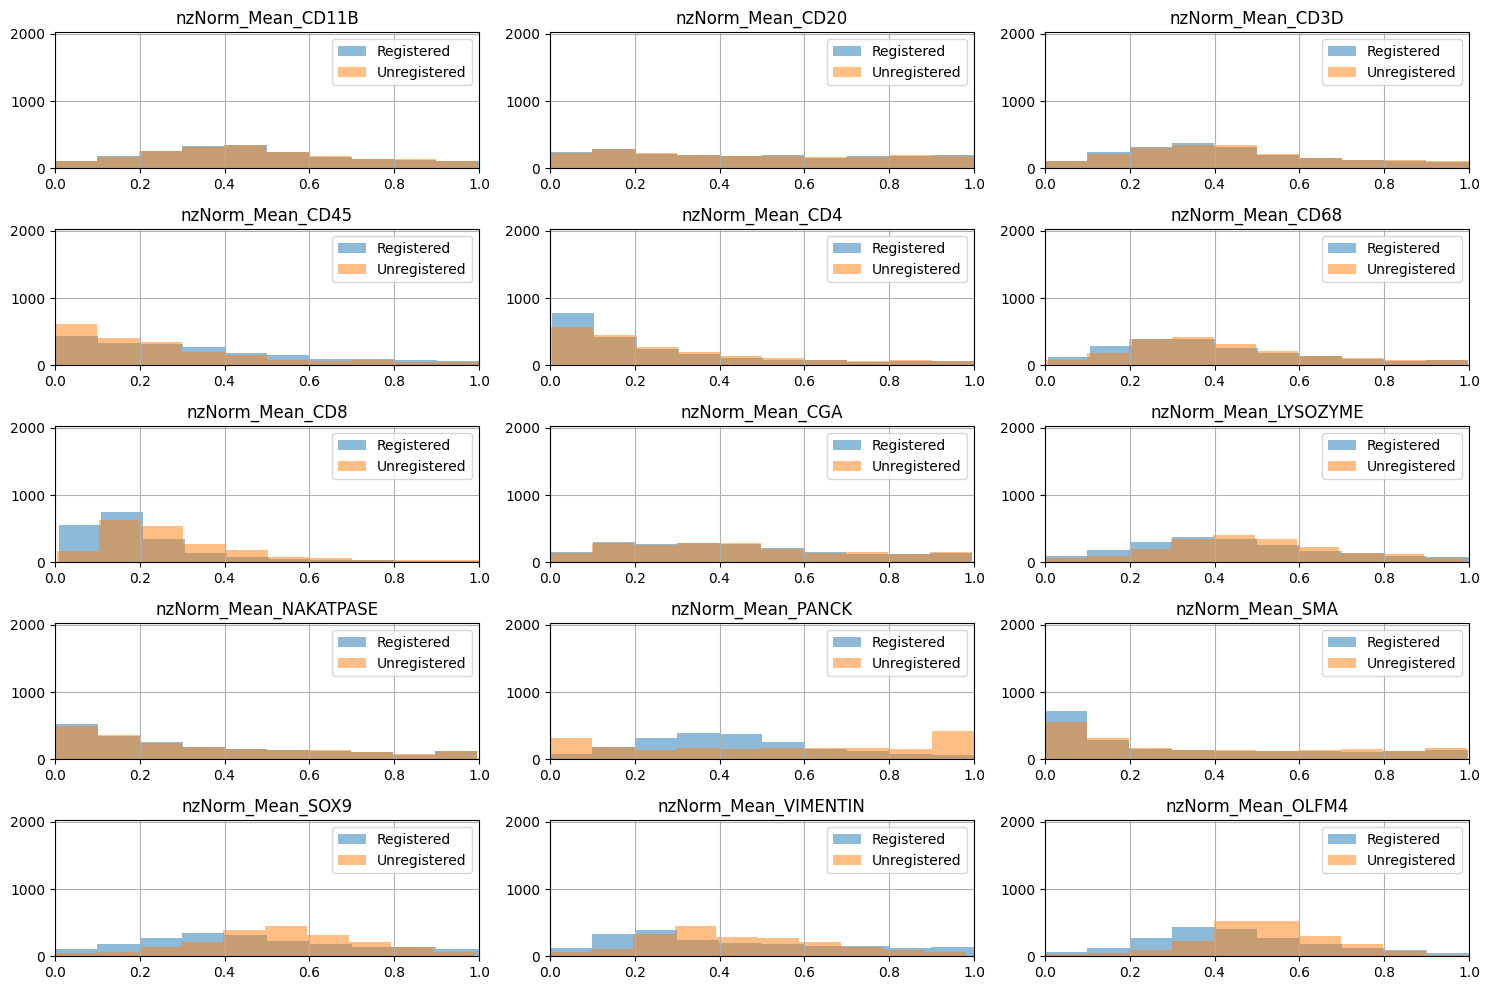

In [22]:
plot_dataframes(df_registered, df_unregistered)